**Q 1. Make a table of elements from periodic table as following:**
    
• Collect letter symbols of elements in column1

• Collect atomic numbers in column2

• Collect electronegativity in column3

• Collect atomic radii in column4 (you can use this link: https://en.wikipedia.org/wiki/Atomic_
radii_of_the_elements_(data_page))

• Collect thermal conductivity in column5

• Collect density in column6

• Collect crystal system in column7. If not available, delete this element from your dataset.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm

In [7]:
# reading the dataset from assignment
df = pd.read_csv('assignment3.txt')
df.head()

,Elements,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density,Crystal System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO


In [8]:
# describing the data without the nan values.
# We see that the max nan values in density because of gaseous elements.
df.describe()

,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,48.094737,1.678211,1.484737,57.630909,7555.157053
std,27.718599,0.718910,0.400077,80.243927,5889.588041
min,1.000000,0.000000,0.250000,0.003610,0.090000
25%,24.500000,1.220000,1.300000,9.400000,2440.000000
50%,48.000000,1.620000,1.450000,23.000000,7010.000000
75%,71.500000,2.170000,1.755000,81.000000,10145.000000
max,96.000000,3.980000,2.600000,430.000000,22600.000000


In [9]:
df.dtypes

Elements                 object
Atomic Number             int64
Electronegativity       float64
Atomic Radius           float64
Thermal Conductivity    float64
Density                 float64
Crystal System           object
dtype: object

**For electronegativity, raddi, thermal conductivity and density, do the following analysis:**

• Plot these values on the Y-axis vs. elements on the X-axis.

• Arrange in increasing order, divide the span of the values of each of these into 10 equal size bins,
count the number of elements in each bin and plot number of elements on the Y-axis vs. bins on the
X-axis.

Make bins of crystal systems, count the number of elements falling in each crystal system and plot the
number of elements in each bin on Y-axis vs. bin on the X-axis.

Analyze and describe your observations in the context of probability distributions.

You are welcome to use any existing function or library if you are aware of.


# Now for the Number of elements Vs Electronegativity 

Text(0.5, 1.0, 'Plot of properties vs elements')

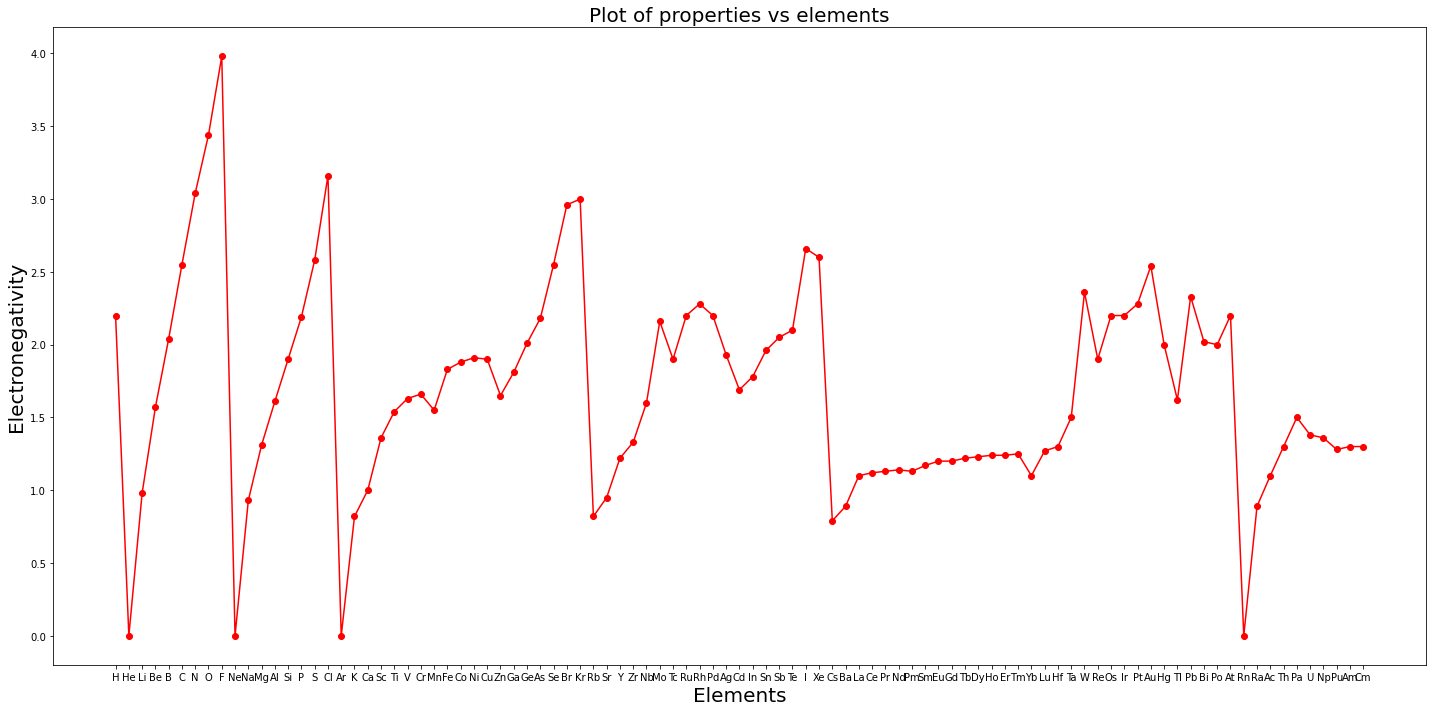

In [10]:
# Part 1: plotting the number of elements wrt electronegativity data

copy_df = df.iloc[:,[0,2]]
copy_df =copy_df.dropna()

fig,axs = plt.subplots(1,1,figsize=(20,10),tight_layout = True)
axs.plot(copy_df['Elements'],copy_df['Electronegativity'],color = 'r',marker = 'o')
plt.xlabel('Elements',fontsize =20)
plt.ylabel('Electronegativity',fontsize =20)
plt.title('Plot of properties vs elements',fontsize =20)

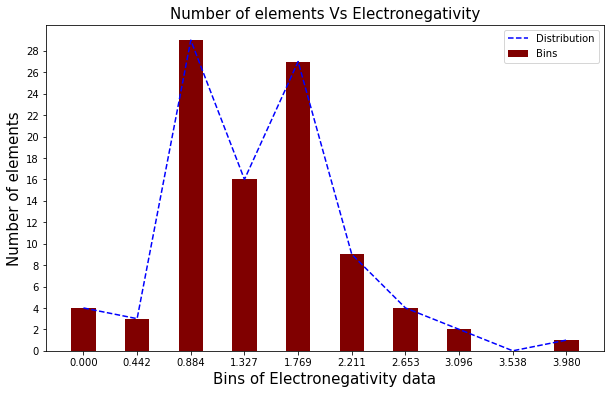

In [11]:
# Figure 1: Distribution of number of elements w.r.t Electronegativity

copy_df = copy_df.sort_values('Electronegativity')
a, b = copy_df.shape
# Defining The Span of elements
x = np.linspace(copy_df.iloc[0,1],copy_df.iloc[a-1,1],10)

count = []
for y in range(9):
    bin =0
    for i in copy_df['Electronegativity']:
        if (i>=x[y])& (i<x[y+1]):
            bin +=1
        
    count.append(bin)
count.append(1)

fig =plt.figure(figsize = (10,6))
plt.bar(x,count,width =0.2,color = 'maroon')
plt.plot(x,count,'--b')
plt.xlabel("Bins of Electronegativity data", fontsize =15)
plt.ylabel('Number of elements',fontsize =15)
plt.xticks(x)
plt.title('Number of elements Vs Electronegativity', fontsize = 15)
plt.yticks(np.arange(0,30,2))
plt.legend(["Distribution","Bins"],loc = 'upper right')

In [12]:
copy_df.describe()

,Electronegativity
count,95.000000
mean,1.678211
std,0.718910
min,0.000000
25%,1.220000
50%,1.620000
75%,2.170000
max,3.980000


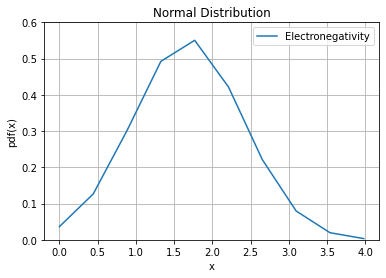

In [23]:
# Probability Distributions of the distributions.
fig, ax = plt.subplots()
x = np.linspace(copy_df.iloc[0,1],copy_df.iloc[a-1,1],10)


ax.plot(x, norm.pdf(x,loc= 1.678211,scale=(0.718910)), label='Electronegativity')
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.6)
ax.grid(True)

### **Normal distribution of data with 60% of data concentrated at 1 to 2 means that most of the elements has electronegativity range between 1 and 3**

#  Now for the Number of elements Vs Atomic radius

Text(0.5, 1.0, 'Plot of properties vs elements')

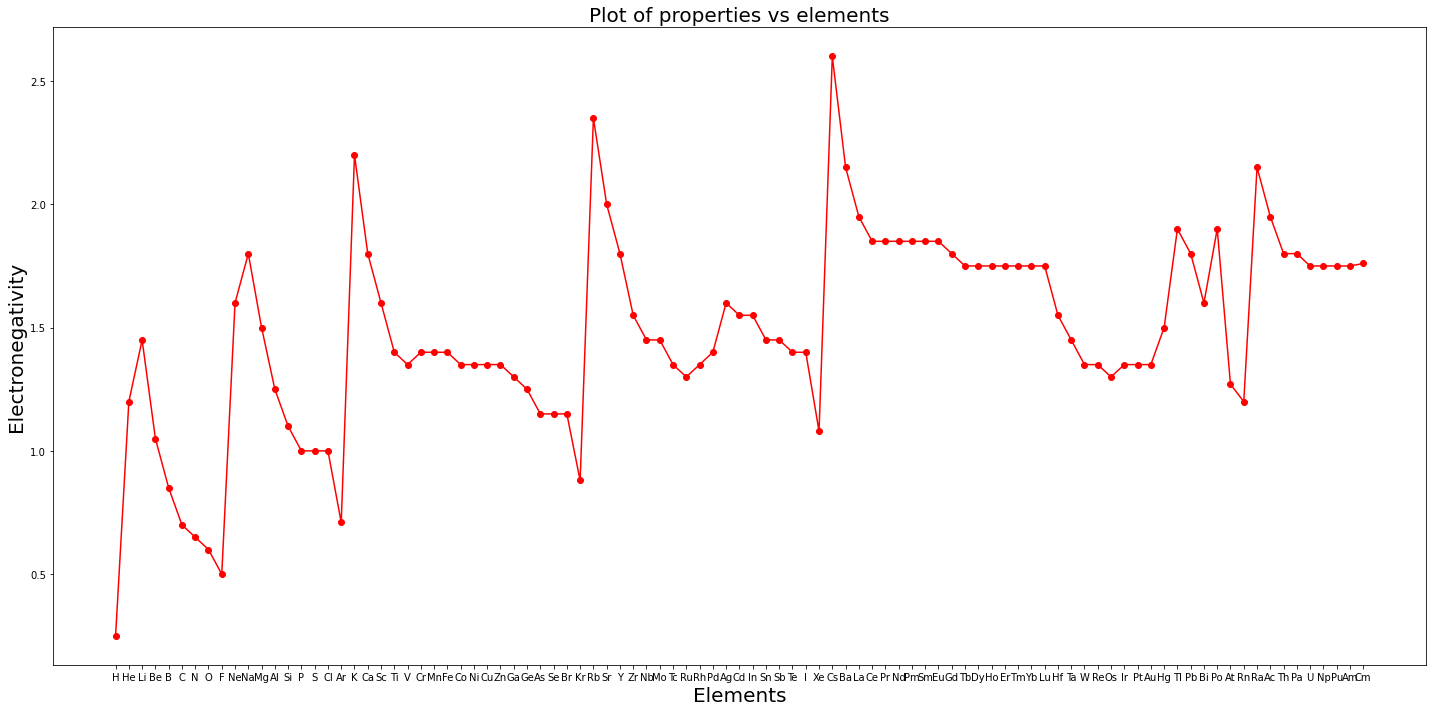

In [24]:
# Part 1: Number of elements Vs Atomic radius
df1 = df.iloc[:,[0,3]]
df1 =df1.dropna()

fig,axs = plt.subplots(1,1,figsize=(20,10),tight_layout = True)
axs.plot(df1['Elements'],df1['Atomic Radius'],color = 'r',marker = 'o')
plt.xlabel('Elements',fontsize =20)
plt.ylabel('Electronegativity',fontsize =20)
plt.title('Plot of properties vs elements',fontsize =20)

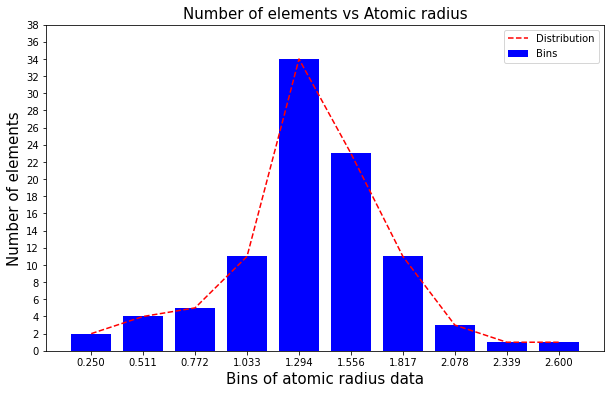

In [25]:
# Figure 2: Distribution of number of elements w.r.t Atomic radius
a1,b1 = df1.shape
df1 = df1.sort_values('Atomic Radius')
x = np.linspace(df1.iloc[0,1],df1.iloc[a1-1,1],10)
count = []
for y in range(9):
    bin =0
    for i in df1['Atomic Radius']:
        if (i>=x[y])& (i<x[y+1]):
            bin +=1
        
    count.append(bin)
count.append(1)

fig =plt.figure(figsize = (10,6))
plt.bar(x,count,width =0.2,color = 'blue')
plt.plot(x,count,'--r')
plt.xlabel("Bins of atomic radius data", fontsize =15)
plt.ylabel('Number of elements',fontsize =15)
plt.xticks(x)
plt.title('Number of elements vs Atomic radius', fontsize = 15)
plt.yticks(np.arange(0,40,2))
plt.legend(["Distribution","Bins"],loc = 'upper right')

In [26]:
df1.describe()

,Atomic Radius
count,95.000000
mean,1.484737
std,0.400077
min,0.250000
25%,1.300000
50%,1.450000
75%,1.755000
max,2.600000


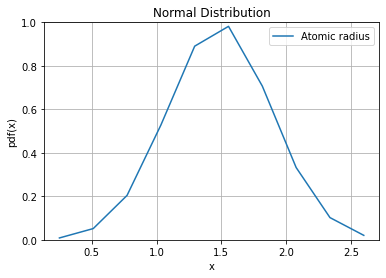

In [27]:
fig, ax = plt.subplots()
x = np.linspace(df1.iloc[0,1],df1.iloc[a1-1,1],10)


ax.plot(x, norm.pdf(x,loc = 1.484737,scale = 0.400077), label='Atomic radius')
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,1)
ax.grid(True)

### **We see a normal distribution of data with mean at 1.48 and std deviation at 0.40**

# Now  for the distribution of Number of elements Vs Thermal conductivity

Text(0.5, 1.0, 'Plot of properties vs elements')

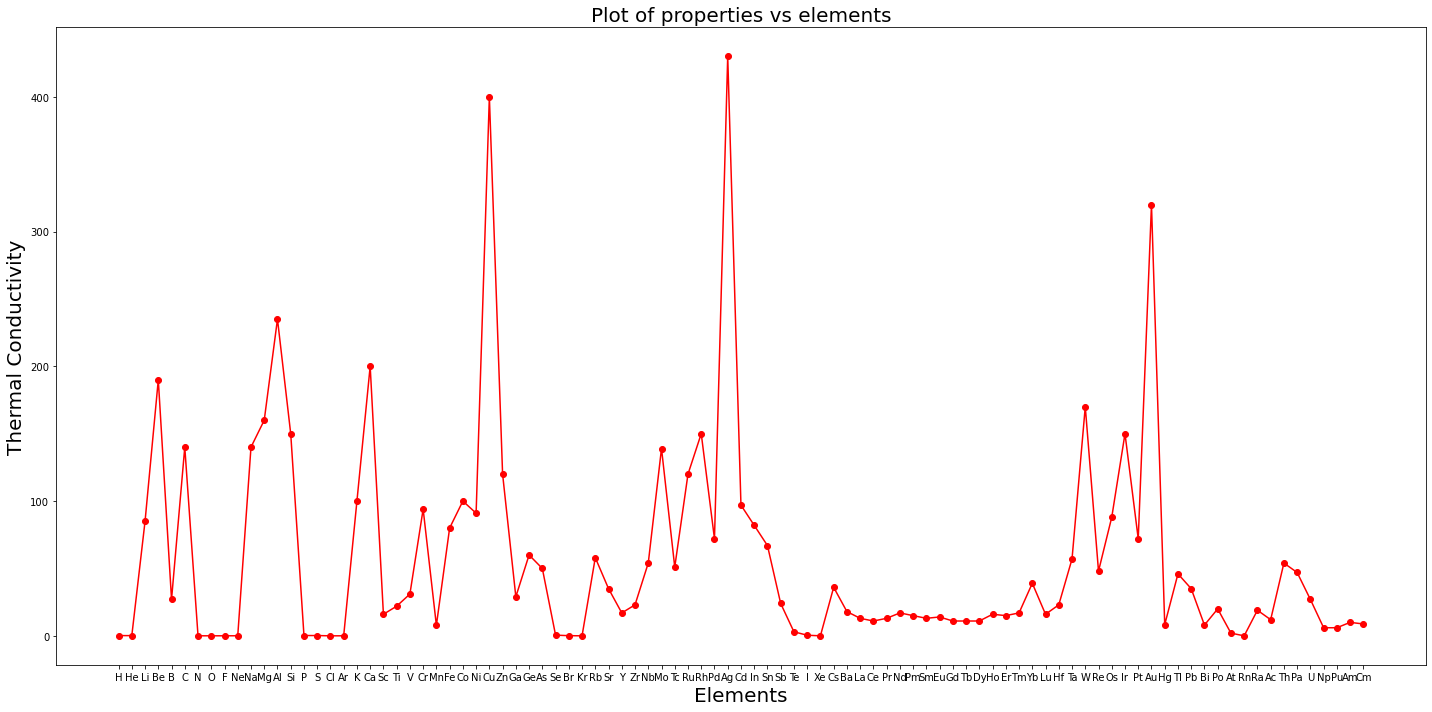

In [28]:
# Thermal conductivity variation of the data
df2 = df.iloc[:,[0,4]]
df2 =df2.dropna()    
#Dropping all the nan values from the graph

fig,axs = plt.subplots(1,1,figsize=(20,10),tight_layout = True)
axs.plot(df2['Elements'],df2['Thermal Conductivity'],color = 'r',marker = 'o')
plt.xlabel('Elements',fontsize =20)
plt.ylabel('Thermal Conductivity',fontsize =20)
plt.title('Plot of properties vs elements',fontsize =20)

### **Density for the gases elements is leading to zero therefore we some elements tending to zero**

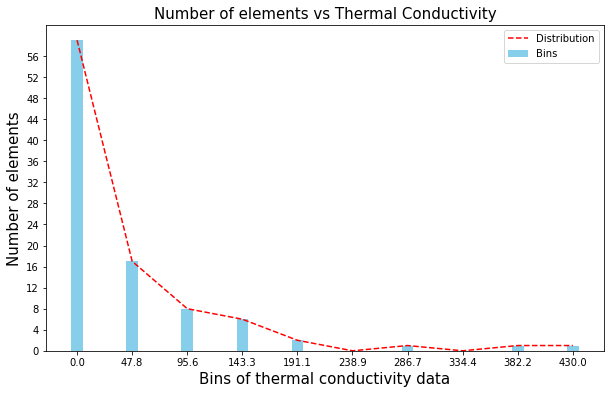

In [29]:
# Figure 3: Distribution of number of elements w.r.t thermal Conductivity
df2 = df2.sort_values('Thermal Conductivity')
#Sorting of values based on thermal conductivity
a2,b2 = df2.shape
x = np.linspace(df2.iloc[0,1],df2.iloc[a2-1,1],10)
count = []
for y in range(9):
    bin =0
    for i in df2['Thermal Conductivity']:
        if (i>=x[y])& (i<x[y+1]):
            bin +=1
        
    count.append(bin)
count.append(1)

fig =plt.figure(figsize = (10,6))
plt.bar(x,count,width =10,color = 'skyblue')
plt.plot(x,count,"--r")
plt.xlabel("Bins of thermal conductivity data", fontsize =15)
plt.ylabel('Number of elements',fontsize =15)
plt.xticks(x)
plt.title('Number of elements vs Thermal Conductivity', fontsize = 15)
plt.yticks(np.arange(0,60,4))
plt.legend(["Distribution","Bins"],loc = 'upper right')

In [30]:
df2.describe()

,Thermal Conductivity
count,95.000000
mean,57.630909
std,80.243927
min,0.003610
25%,9.400000
50%,23.000000
75%,81.000000
max,430.000000


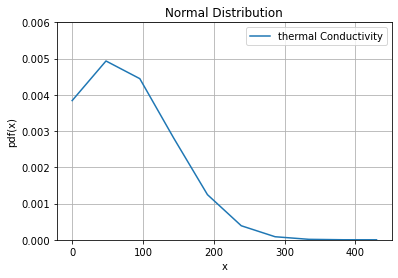

In [32]:
fig, ax = plt.subplots()
x = np.linspace(df2.iloc[0,1],df2.iloc[a2-1,1],10)


ax.plot(x, norm.pdf(x,loc =57.630909 ,scale = 80.243927), label='thermal Conductivity')
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.006)
ax.grid(True)

### **We see that the plot is highly screwed towards the left and has low pdf. This is because of the high span of the data where most of the elements exhibit less than 1 thermal conductivity values**

# Now for the distribution of number of elements Vs Density of solids

Text(0.5, 1.0, 'Plot of properties vs elements')

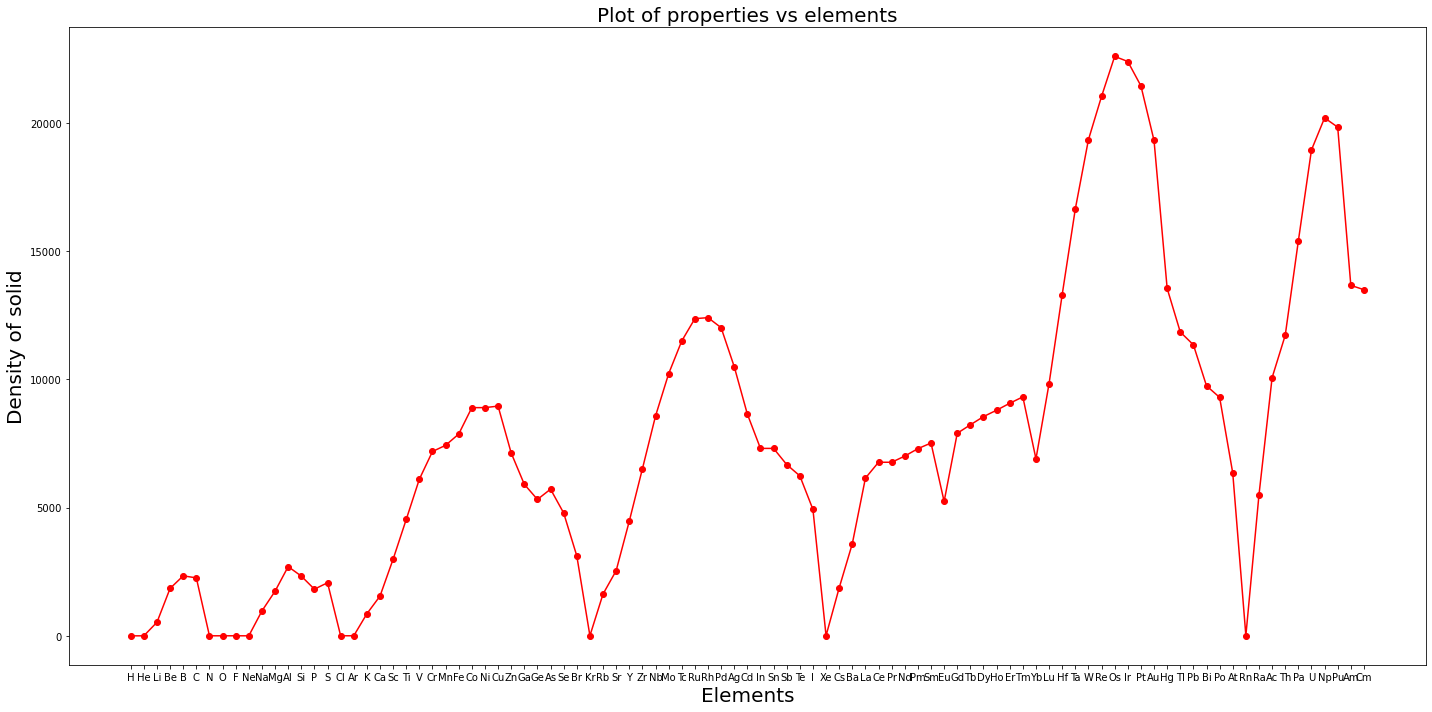

In [34]:
# Plot of Number of elements Vs Density of solid
df3 = df.iloc[:,[0,5]]
df3 =df3.dropna()  

fig,axs = plt.subplots(1,1,figsize=(20,10),tight_layout = True)
axs.plot(df3['Elements'],df3['Density'],color = 'r',marker = 'o')
plt.xlabel('Elements',fontsize =20)
plt.ylabel('Density of solid',fontsize =20)
plt.title('Plot of properties vs elements',fontsize =20)

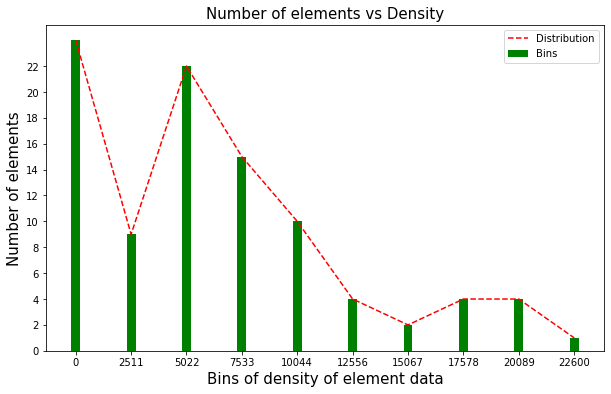

In [36]:
# Figure 4: Distribution of number of elements w.r.t density of solids
df3 = df3.sort_values('Density')
a3,b3 = df3.shape
x = np.linspace(df3.iloc[0,1],df3.iloc[a3-1,1],10)
count = []
for y in range(9):
    bin =0
    for i in df3['Density']:
        if (i>=x[y])& (i<x[y+1]):
            bin +=1
        
    count.append(bin)
count.append(1)

fig =plt.figure(figsize = (10,6))
plt.bar(x,count,width =400,color = 'green')
plt.plot(x,count,'--r')
plt.xlabel("Bins of density of element data", fontsize =15)
plt.ylabel('Number of elements',fontsize =15)
plt.xticks(x)
plt.title('Number of elements vs Density', fontsize = 15)
plt.yticks(np.arange(0,24,2))
plt.legend(["Distribution","Bins"],loc = 'upper right')
plt.show()

In [37]:
df3.describe()

,Density
count,95.000000
mean,7555.157053
std,5889.588041
min,0.090000
25%,2440.000000
50%,7010.000000
75%,10145.000000
max,22600.000000


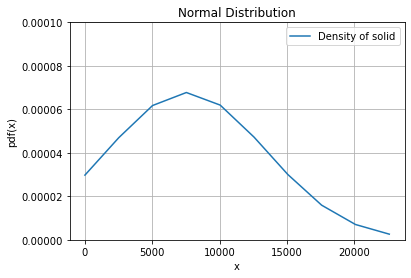

In [38]:
fig, ax = plt.subplots()
x = np.linspace(df3.iloc[0,1],df3.iloc[a3-1,1],10)


ax.plot(x, norm.pdf(x,loc = 7555.157053,scale = 5889.588041), label='Density of solid')
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.0001)
ax.grid(True)

### **We see that the plot has low pdf because of the large standard deviation /span of the distribution of the data**.
### The probability for the density is as less as 0.0008 because of the large range of Density. Density is increasing with the atomic number but now we see that the gaseous elements having low density tend to close to zero.

# Now for the crystal structure of the elements.

In [84]:
df4 = df.iloc[:,[0,6]]
df4 =df4.dropna()  

groupped_data = df4.groupby('Crystal System',sort=False).count()

In [90]:
groupped_data.describe()

,Elements
count,10.000000
mean,9.500000
std,9.675284
min,1.000000
25%,3.000000
50%,5.500000
75%,14.000000
max,30.000000


([<matplotlib.axis.YTick at 0x1921c148490>,
 <a list of 16 Text major ticklabel objects>)

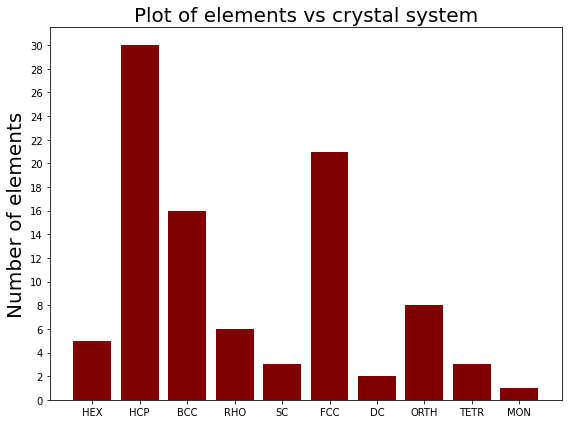

In [98]:
plt.subplots(figsize=(8,6),tight_layout=True)
plt.bar(groupped_data.index,groupped_data['Elements'],label = 'Crystal system',color = 'maroon')
plt.ylabel('Number of elements',fontsize =20)
plt.title('Plot of elements vs crystal system',fontsize =20)
plt.yticks(np.arange(0,32,2))

### Maximum no. of elements exhibit HCP followed by FCC and BCC elements 